# Healpix Localization

In [27]:
%matplotlib notebook

In [6]:
# imports
import numpy as np

import healpy as hp

from astropy.coordinates import SkyCoord
from astropy import units

# Brutally simple

## CHIME FRB (make believish)

In [51]:
frb_181030 = SkyCoord('10h34m15s 73d44m40s', frame='icrs')
frb_181030

<SkyCoord (ICRS): (ra, dec) in deg
    (158.5625, 73.74444444)>

In [57]:
# 1-sigma error
a = 60. # units.arcsec
b = 20.

## Figure out NSIDE

In [55]:
nside = 2**16
hp.nside2resol(nside, arcmin=True)*60.

3.220768511078818

In [56]:
NPIX = hp.nside2npix(nside)
HP_FRB = np.zeros(NPIX)
NPIX

51539607552

## Grid up

In [81]:
box_hwidth = 180. # arcsec
step_size = 1.5    # arcsec
ngrid = int(np.round(2 * box_hwidth / step_size))
x = np.linspace(-box_hwidth, box_hwidth, ngrid)
xcoord, ycoord = np.meshgrid(x,x)
theta = np.sqrt(xcoord**2 + ycoord**2)

## FRB probability

In [82]:
L_wx = np.exp(-xcoord ** 2 / (2 * a ** 2)) * np.exp(
        -ycoord ** 2 / (2 * b ** 2)) / (2*np.pi*a*b)

In [83]:
loncoord = frb_181030.ra.deg + xcoord/3600.
latcoord = frb_181030.dec.deg + ycoord/3600.
hp_index = hp.ang2pix(nside, loncoord, latcoord, lonlat=True)

In [84]:
HP_FRB[hp_index] = L_wx

In [86]:
np.max(L_wx)

0.00013252467499223959

In [78]:
hp_index

array([[1036576076, 1036485015, 1036485015, ..., 1036485039, 1036576101,
        1036485040],
       [1036393957, 1036393957, 1036393957, ..., 1036485039, 1036393982,
        1036393982],
       [1036302903, 1036302903, 1036302903, ..., 1036302928, 1036302928,
        1036302928],
       ...,
       [1024137879, 1024137879, 1024137879, ..., 1024047390, 1024137904,
        1024137904],
       [1024047365, 1024047365, 1023956856, ..., 1024047390, 1024047390,
        1024047390],
       [1023956855, 1023866350, 1023866350, ..., 1023956880, 1023956880,
        1023866375]])

## Plot me -- Appears to be too big for matplotlib

In [76]:
HP_FRB.size

51539607552

<IPython.core.display.Javascript object>


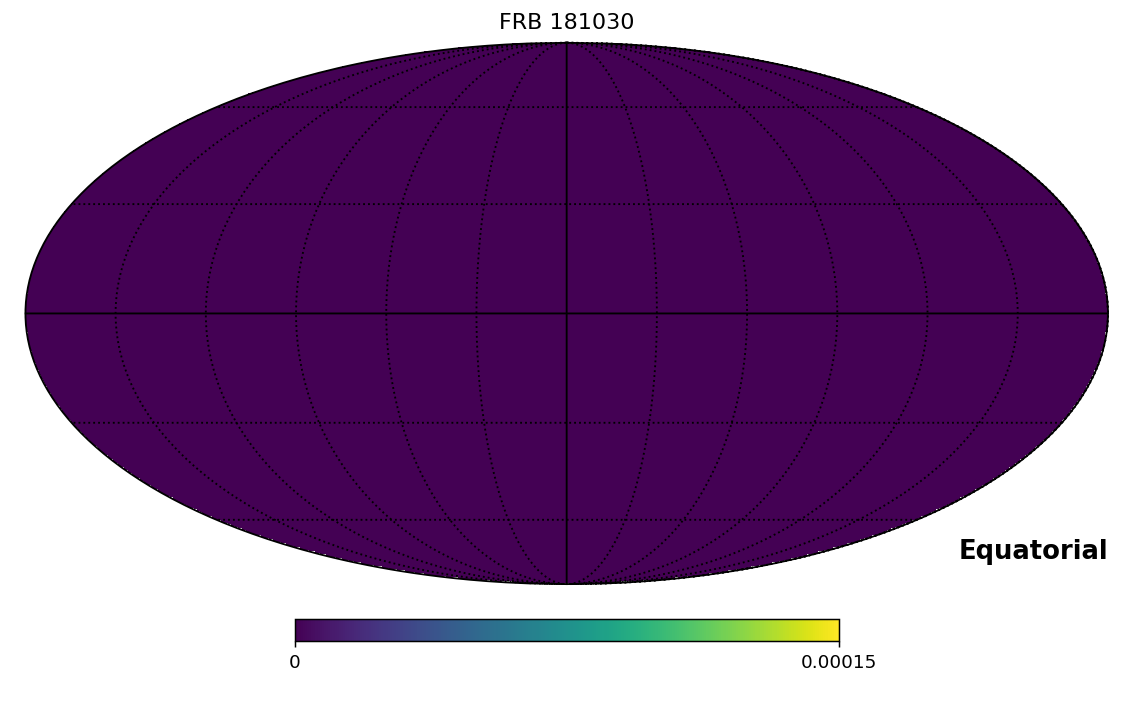

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

In [90]:
hp.mollview(
    HP_FRB,
    coord=["C"],
    title="FRB 181030",
    #unit="mK",
    #norm="hist",
    min=0.,
    max=0.00015,
)
hp.graticule()

## Check

In [88]:
hpi = hp.ang2pix(nside, 158.5625, 73.74444444, lonlat=True)
hpi

1030211425

In [89]:
HP_FRB[hpi]

0.00013252467499223959

## Write

In [ ]:
hp.write_map("FRB181030.fits", HP_FRB, overwrite=True)

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:197: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(
